<img src='./car.png' style='height: 260px; width:1100px'>

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading Dataset

In [2]:
car_df = pd.read_csv("CarPrice_Assignment.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning & EDA

In [3]:
car_df.shape

(205, 26)

In [4]:
car_df.drop(columns=["car_ID", "symboling", "carheight", "stroke", "compressionratio", "peakrpm"], inplace=True)
car_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


In [5]:
car_df.shape

(205, 20)

In [6]:
car_df.isnull().sum()

CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
price             0
dtype: int64

In [7]:
car_df.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,2555.565854,126.907317,3.329756,104.117073,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,520.680204,41.642693,0.270844,39.544167,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,1488.000000,61.000000,2.540000,48.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,2145.000000,97.000000,3.150000,70.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,2414.000000,120.000000,3.310000,95.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,2935.000000,141.000000,3.580000,116.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,4066.000000,326.000000,3.940000,288.000000,49.000000,54.000000,45400.000000


In [8]:
cat_features = []
for i in [1, 2, 3, 4, 5, 6, 11, 12, 14]:
    print(f"{car_df.columns[i]} \t {car_df[car_df.columns[i]].unique()}")
    cat_features.append(car_df.columns[i])
    
cat_features.append("CarName")

fueltype 	 ['gas' 'diesel']
aspiration 	 ['std' 'turbo']
doornumber 	 ['two' 'four']
carbody 	 ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel 	 ['rwd' 'fwd' '4wd']
enginelocation 	 ['front' 'rear']
enginetype 	 ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber 	 ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem 	 ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [9]:
car_df["drivewheel"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [10]:
car_df["drivewheel"] = car_df["drivewheel"].replace('4wd', 'fwd')
car_df["drivewheel"].value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

<AxesSubplot:>

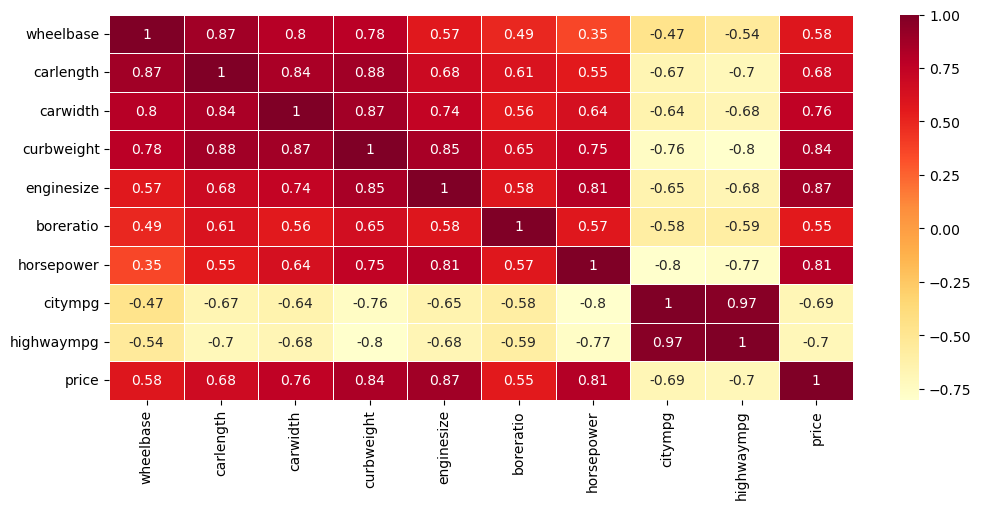

In [11]:
plt.figure(figsize=(12, 5))
sns.heatmap(car_df.corr(), cmap="YlOrRd", annot=True, lw=0.5)

## Model Training

#### Importing ML Libraries

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#### Setting Configuration for Pipeline Diagram

In [13]:
from sklearn import set_config
set_config(display='diagram')

#### Dividing data into dependent and independent features

In [14]:
X = car_df.iloc[:, :19]
y = car_df.iloc[:, -1]

print(X.shape)
print(y.shape)

(205, 19)
(205,)


#### Dividing data into training and testing set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 19)
(41, 19)
(164,)
(41,)


#### OneHotEncoding

In [16]:
ohe = OneHotEncoder()
ohe.fit(X[cat_features])

trf1 = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), cat_features),
    remainder='passthrough'
)

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
pipe_lm = make_pipeline(trf1, lin_reg)

pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['diesel', 'gas'], dtype=object),
                                                                            array(['std', 'turbo'], dtype=object),
                                                                            array(['four', 'two'], dtype=object),
                                                                            array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object),
                                                                            array(['fwd', 'rwd'], dtype=object...
       'volkswagen rabbit', 'volkswagen rabbit custom',
       'volkswagen super beetle', 'volkswagen type 3', 'volvo 144ea',
       'volvo 145e (sw)', 'volvo 244dl', 'volvo 245', 'volvo 246',
       'volvo 264gl', 'volvo diesel', 'vw dasher', 'vw rabbit'],
      dtype=object)]),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem',
                                                   'CarName'])])),
                ('linearregression', LinearRegression())])

In [18]:
y_predLM = pipe_lm.predict(X_test)

In [19]:
r2_lm = metrics.r2_score(y_test, y_predLM).round(4)
r2_lm

0.631

In [20]:
RMSE_lm = metrics.mean_absolute_error(y_test, y_predLM).round(3)
MAE_lm = np.sqrt( metrics.mean_squared_error(y_test, y_predLM)).round(3)
print(f"MAE = {MAE_lm} \nRMSE = {RMSE_lm}")

MAE = 5397.359 
RMSE = 3345.587


## Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
pipe_dt = make_pipeline(trf1, dt)

pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['diesel', 'gas'], dtype=object),
                                                                            array(['std', 'turbo'], dtype=object),
                                                                            array(['four', 'two'], dtype=object),
                                                                            array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object),
                                                                            array(['fwd', 'rwd'], dtype=object...
       'volkswagen super beetle', 'volkswagen type 3', 'volvo 144ea',
       'volvo 145e (sw)', 'volvo 244dl', 'volvo 245', 'volvo 246',
       'volvo 264gl', 'volvo diesel', 'vw dasher', 'vw rabbit'],
      dtype=object)]),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem',
                                                   'CarName'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [22]:
y_predDT = pipe_dt.predict(X_test)

In [23]:
r2_dt = metrics.r2_score(y_test, y_predDT).round(4)
r2_dt

0.8611

In [24]:
RMSE_dt = metrics.mean_absolute_error(y_test, y_predDT).round(3)
MAE_dt = np.sqrt( metrics.mean_squared_error(y_test, y_predDT)).round(3)
print(f"MAE = {MAE_dt} \nRMSE = {RMSE_dt}")

MAE = 3311.453 
RMSE = 2125.943


## Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
pipe_rf = make_pipeline(trf1, rf)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['diesel', 'gas'], dtype=object),
                                                                            array(['std', 'turbo'], dtype=object),
                                                                            array(['four', 'two'], dtype=object),
                                                                            array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object),
                                                                            array(['fwd', 'rwd'], dtype=object...
       'volkswagen super beetle', 'volkswagen type 3', 'volvo 144ea',
       'volvo 145e (sw)', 'volvo 244dl', 'volvo 245', 'volvo 246',
       'volvo 264gl', 'volvo diesel', 'vw dasher', 'vw rabbit'],
      dtype=object)]),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem',
                                                   'CarName'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [26]:
y_predRF = pipe_rf.predict(X_test)

In [27]:
r2_rf = metrics.r2_score(y_test, y_predRF).round(4)
r2_rf

0.9528

In [28]:
RMSE_rf = metrics.mean_absolute_error(y_test, y_predRF).round(3)
MAE_rf = np.sqrt(metrics.mean_squared_error(y_test, y_predRF)).round(3)
print(f"MAE = {MAE_rf} \nRMSE = {RMSE_rf}")

MAE = 1930.629 
RMSE = 1360.637


## Conclusion

In [29]:
pd.DataFrame(data=[[r2_lm, MAE_lm, RMSE_lm], [r2_dt, MAE_dt, RMSE_dt], [r2_rf, MAE_rf, RMSE_rf]], 
             index=['Logistic Regression',"Decision Tree", "Fandom Forest"], 
             columns=["R2 Score", "MAE", "RMSE"])

,R2 Score,MAE,RMSE
Logistic Regression,0.6310,5397.359,3345.587
Decision Tree,0.8611,3311.453,2125.943
Fandom Forest,0.9528,1930.629,1360.637
